In [35]:
import cv2
import numpy as np
import os
import SimpleITK
import pandas as pd
from matplotlib import pyplot as plt 
from scipy import ndimage
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.cm as cmx
import matplotlib.colors as colors
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

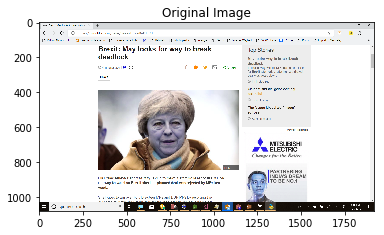

In [36]:
#Read the image
folder='C:\\Documents'
filename='screenbbc.png'
image = cv2.imread(os.path.join(folder,filename))
plt.imshow(image)
plt.title('Original Image')
plt.show()

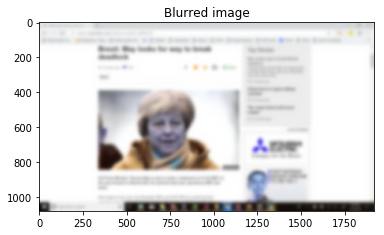

In [45]:
labimg = ndimage.gaussian_filter(image, sigma=(10, 10, 0), order=0)
plt.imshow(labimg)
plt.title('Blurred image')
plt.show()

In [46]:
#Running DBScan algorithm

n = 0
while(n<4):
    labimg = cv2.pyrDown(labimg)
    n = n+1

feature_image=np.reshape(labimg, [-1, 3])
rows, cols, chs = labimg.shape

db = DBSCAN(eps=0.5, min_samples=60).fit(feature_image)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)


Estimated number of clusters: 11
Estimated number of noise points: 4783


In [ ]:
i = 0
markers = matplotlib.lines.Line2D.markers.keys()
colors = list("bgrcmyk")
for cluster in n_clusters:
  marker, color = markers[i % len(markers)], colors[i % len(colors)]
  plt.plot(cluster[:,0],cluster[:,1],marker+color)
  i += 1

In [25]:
#Morphologial operations on image

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale
_,thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV) # threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 13) # dilate
_, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours

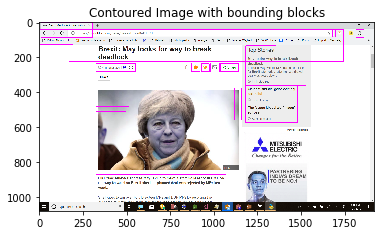

In [26]:
for contour in contours:
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)

    # discard areas that are too large
    if h>300 and w>300:
        continue

    # discard areas that are too small
    if h<40 or w<40:
        continue

    # draw rectangle around contour on original image
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

plt.imshow(image)
plt.title('Contoured Image with bounding blocks')
plt.show()
